In [19]:
# dependencies
import os
import sys
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
import seaborn as sns

sns.set()
sns.set_style("dark")
# sns.set_style("whitegrid")
sns.set_context("paper", font_scale=4, rc={"lines.linewidth": 4})
mpl.rcParams['lines.linewidth'] = 3

In [20]:
import pyvista as pv
import geopandas as gpd
from shapely.geometry import Point
from descartes import PolygonPatch

In [21]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon

In [22]:
import random
import datetime

# Get district data

In [23]:
sys.path.insert(0, '../county_data')
from read_county_data import *

In [24]:
sys.path.insert(1, '../district_data')
from read_district_data import *

In [25]:
# get county data
county_nms, county_dist, county_dist_names, county_polys = read_county_map('../county_data/data/')
N_counties = len(county_nms)

In [26]:
# get district data
new_dist_nm, new_dist_county_nbr, new_dist_county_nm, new_dist_geom = read_dist_map('../district_data/data/', county_nms, county_dist, 
                                                  county_dist_names, county_polys, 0)
N_districts = len(new_dist_nm)

In [27]:
for i in range(len(county_nms)):
    print('{0:<16} {1:<10}'.format(county_nms[i], i))

Anderson         0         
Andrews          1         
Angelina         2         
Aransas          3         
Archer           4         
Armstrong        5         
Atascosa         6         
Austin           7         
Bailey           8         
Bandera          9         
Bastrop          10        
Baylor           11        
Bee              12        
Bell             13        
Bexar            14        
Blanco           15        
Borden           16        
Bosque           17        
Bowie            18        
Brazoria         19        
Brazos           20        
Brewster         21        
Briscoe          22        
Brooks           23        
Brown            24        
Burleson         25        
Burnet           26        
Caldwell         27        
Calhoun          28        
Callahan         29        
Cameron          30        
Camp             31        
Carson           32        
Cass             33        
Castro           34        
Chambers         35 

In [28]:
def find_county_id(nm):
    for i in range(N_counties):
        if nm == county_nms[i]:
            return i
            

# Read processed COVID-19 data

In [29]:
data_path = 'Data_7July2020/'
total_inf_dist = np.loadtxt(data_path + 'processed/infected_total_district.txt')
dec_dist = np.loadtxt(data_path + 'processed/deceased_district.txt')

# Read mesh

In [31]:
# Load the sample data
mesh_path = '../../Data/mesh/'
mesh_fname = 'mesh_5h'
mesh = pv.read(mesh_path + mesh_fname + '.vtk')

mesh_nodes = mesh.points
mesh_elems = mesh.cells

# Plot data and triangulation

In [32]:
DATA_DAY_BEGIN = [6, 3, 2020]
DATA_TOTAL_DAYS = len(total_inf_dist)

covid_data_t = [i for i in range(DATA_TOTAL_DAYS)]
date_start = datetime.datetime(year = DATA_DAY_BEGIN[2], month=DATA_DAY_BEGIN[1], day = DATA_DAY_BEGIN[0])
covid_data_tdate = [date_start + datetime.timedelta(days=i) for i in range(DATA_TOTAL_DAYS)]

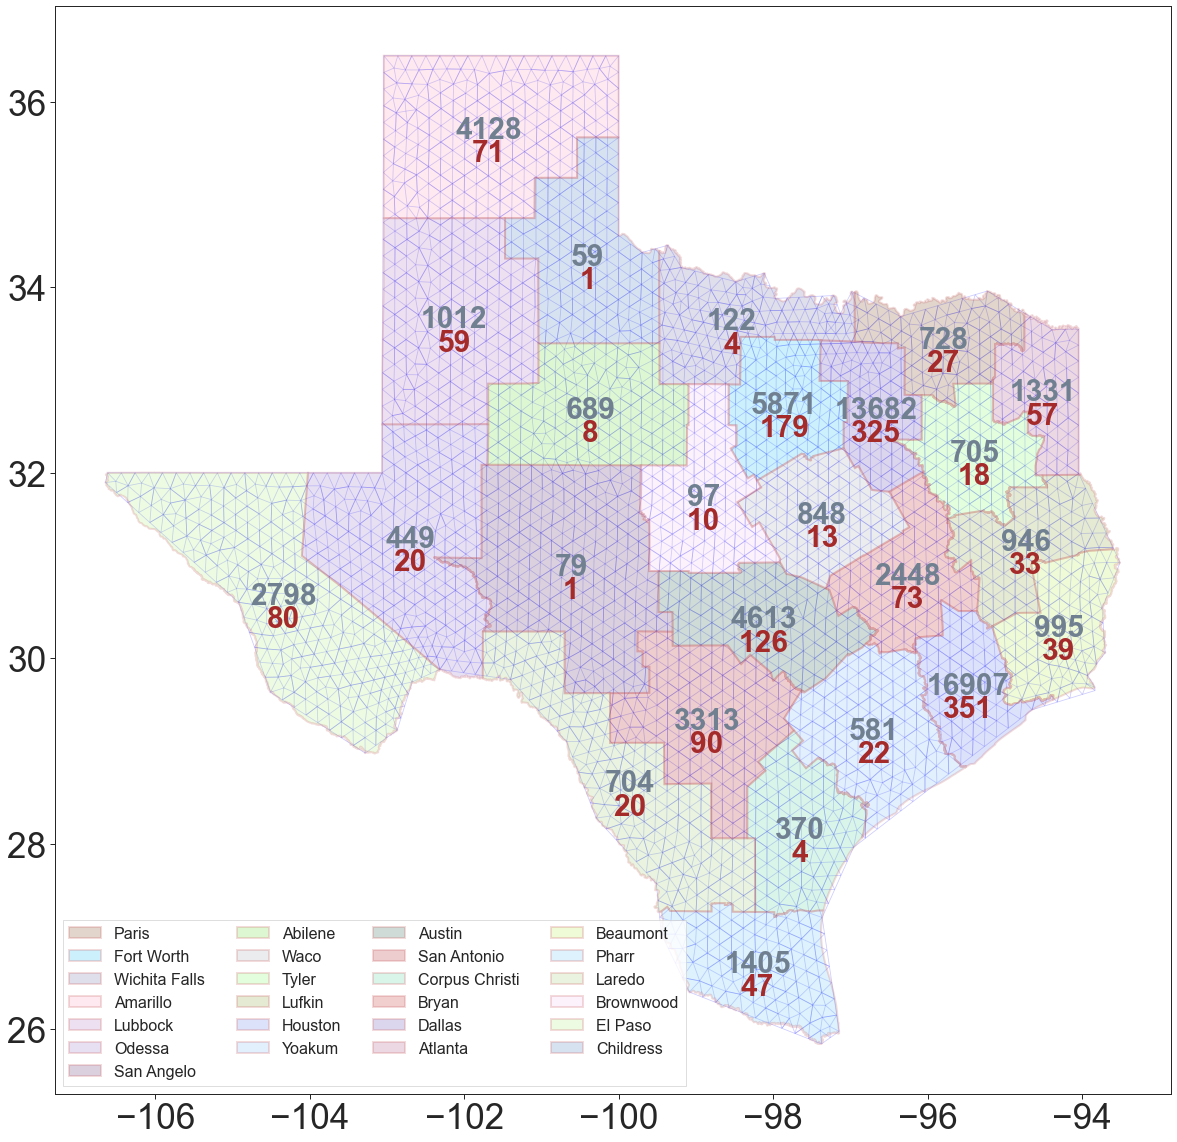

In [33]:
from descartes import PolygonPatch
sns.set_style("ticks")

fig = plt.figure(figsize=(20, 20))
plt.autoscale(enable=True, axis='both')
plt.gca().set_facecolor("white")

district_names = [r'Paris',r'Fort Worth',r'Wichita Falls', r'Amarillo', r'Lubbock', r'Odessa',\
                  r'San Angelo', r'Abilene', r'Waco', r'Tyler', r'Lufkin', r'Houston', r'Yoakum',\
                  r'Austin', r'San Antonio', r'Corpus Christi', r'Bryan', r'Dallas', r'Atlanta',\
                  r'Beaumont', r'Pharr', r'Laredo', r'Brownwood', r'El Paso', r'Childress']

data_view_t = -37

def get_point(i, nodes):
    return [nodes[i][0], nodes[i][1]]

def get_tri_nodes(i, nodes, elems):
    vx = []
    vy = []
    for j in range(3):
        v = get_point(elems[4*i+j+1], nodes)
        vx.append(v[0])
        vy.append(v[1])
        
    return vx, vy

def get_polygon(i, nodes, elems):
    
    v1 = get_point(elems[4*i+1], nodes)
    v2 = get_point(elems[4*i+2], nodes)
    v3 = get_point(elems[4*i+3], nodes)
#     return Polygon(((v1[0], v1[1]), (v2[0], v2[1]), (v3[0], v3[1])))
    #return Polygon([v1, v2, v3], closed=False, color=np.random.rand(3,), alpha=0.5, fill=True, edgecolor=None)
    return Polygon([v1, v2, v3], closed=False, alpha=0.2, fill=False, edgecolor='blue')

def plot_tri():
    for i in range(mesh.n_cells):
        #ax.add_patch(get_polygon(i, mesh_nodes, mesh_elems))
        tri = get_polygon(i, mesh_nodes, mesh_elems)
        plt.gca().add_patch(tri)

        vx, vy = get_tri_nodes(i, mesh_nodes, mesh_elems)
        vx_mid = np.mean(vx)
        vy_mid = np.mean(vy)
        #plt.text(vx_mid, vy_mid, str(i), fontsize=8)
        
def plot_dist():
    ax = fig.gca() 
    for i in range(len(new_dist_geom)):
        poly = new_dist_geom[i]
        ax.add_patch(PolygonPatch(poly, fill=True, fc=np.random.rand(3,), ec='r', 
                                alpha=0.2, zorder=2, linewidth=2, label=district_names[i]))
#         plt.text(poly.centroid.xy[0][0], poly.centroid.xy[1][0], 
#                  str(int(total_inf_dist[data_view_t][i])) + '\n' + str(int(dec_dist[data_view_t][i])), 
#                  ha='center', va='center', fontsize='40')
        plt.text(poly.centroid.xy[0][0], poly.centroid.xy[1][0], 
                 str(int(total_inf_dist[data_view_t][i])), 
                 ha='center', va='center', fontsize='30', color='slategrey', fontweight='bold')
        plt.text(poly.centroid.xy[0][0], poly.centroid.xy[1][0] - 0.25, 
                 str(int(dec_dist[data_view_t][i])), 
                 ha='center', va='center', fontsize='30', color='brown', fontweight='bold')
    


plot_tri()
plot_dist()
plt.legend(ncol = 4, fancybox=False, fontsize='16')
plt.savefig('plot_district_total_infected_cases_{}_{}.png'.format(covid_data_tdate[data_view_t].date(), mesh_fname))
plt.savefig('plot_district_total_infected_cases_{}_{}.pdf'.format(covid_data_tdate[data_view_t].date(), mesh_fname))
plt.show()

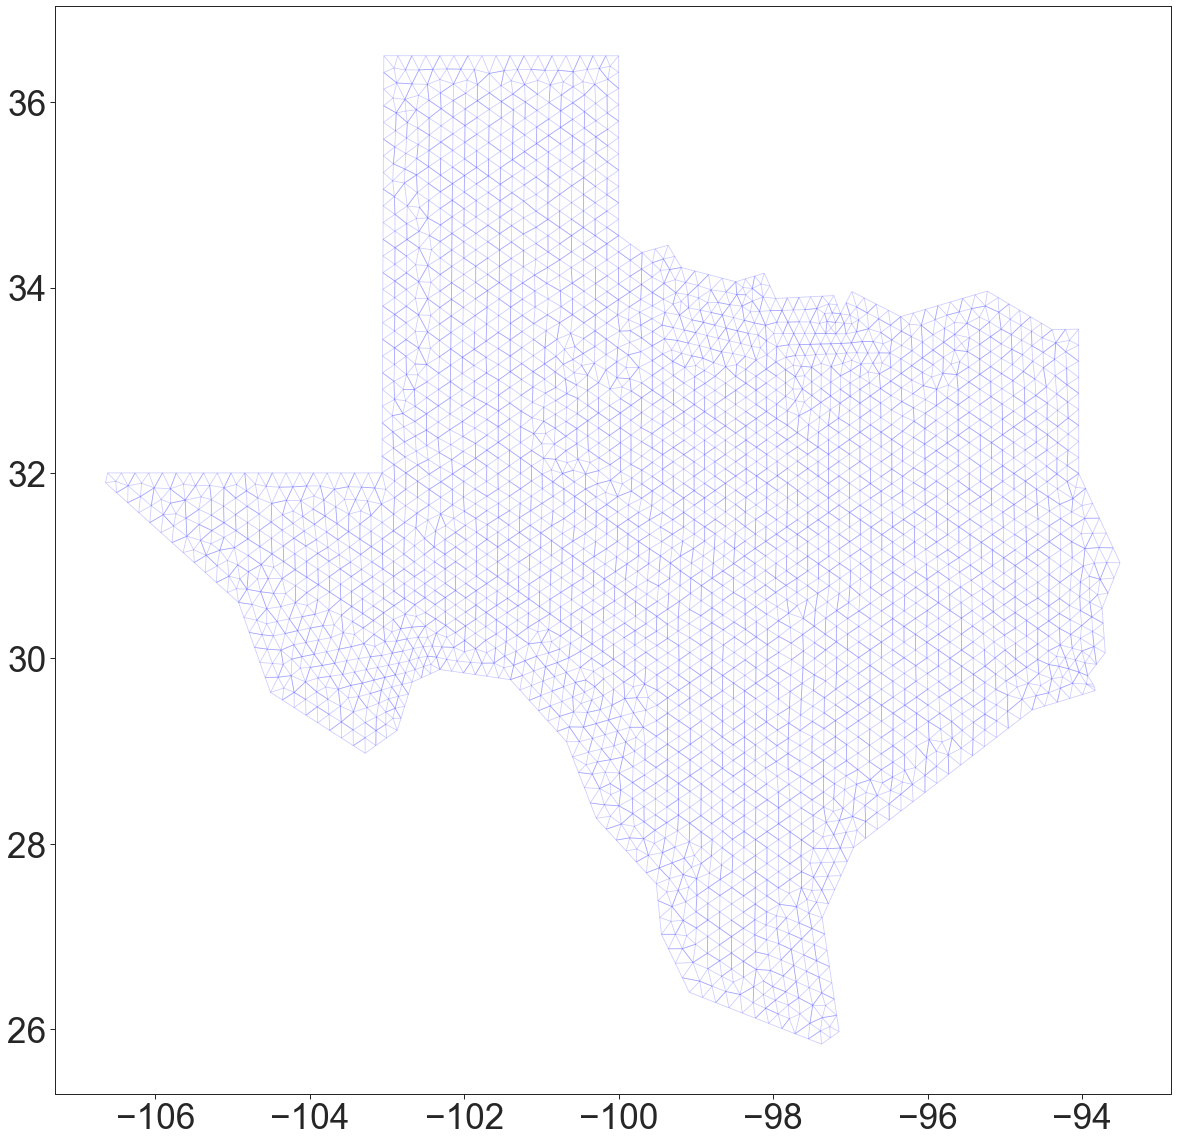

In [37]:
mesh_fname = 'mesh_5h'
mesh = pv.read(mesh_path + mesh_fname + '.vtk')

mesh_nodes = mesh.points
mesh_elems = mesh.cells

fig = plt.figure(figsize=(20, 20))
plt.autoscale(enable=True, axis='both')
plt.gca().set_facecolor("white")

plot_tri()
plt.savefig('coarse_mesh.png')
# plt.savefig('plot_district_total_infected_cases_{}_{}.pdf'.format(covid_data_tdate[data_view_t].date(), mesh_fname))
plt.show()

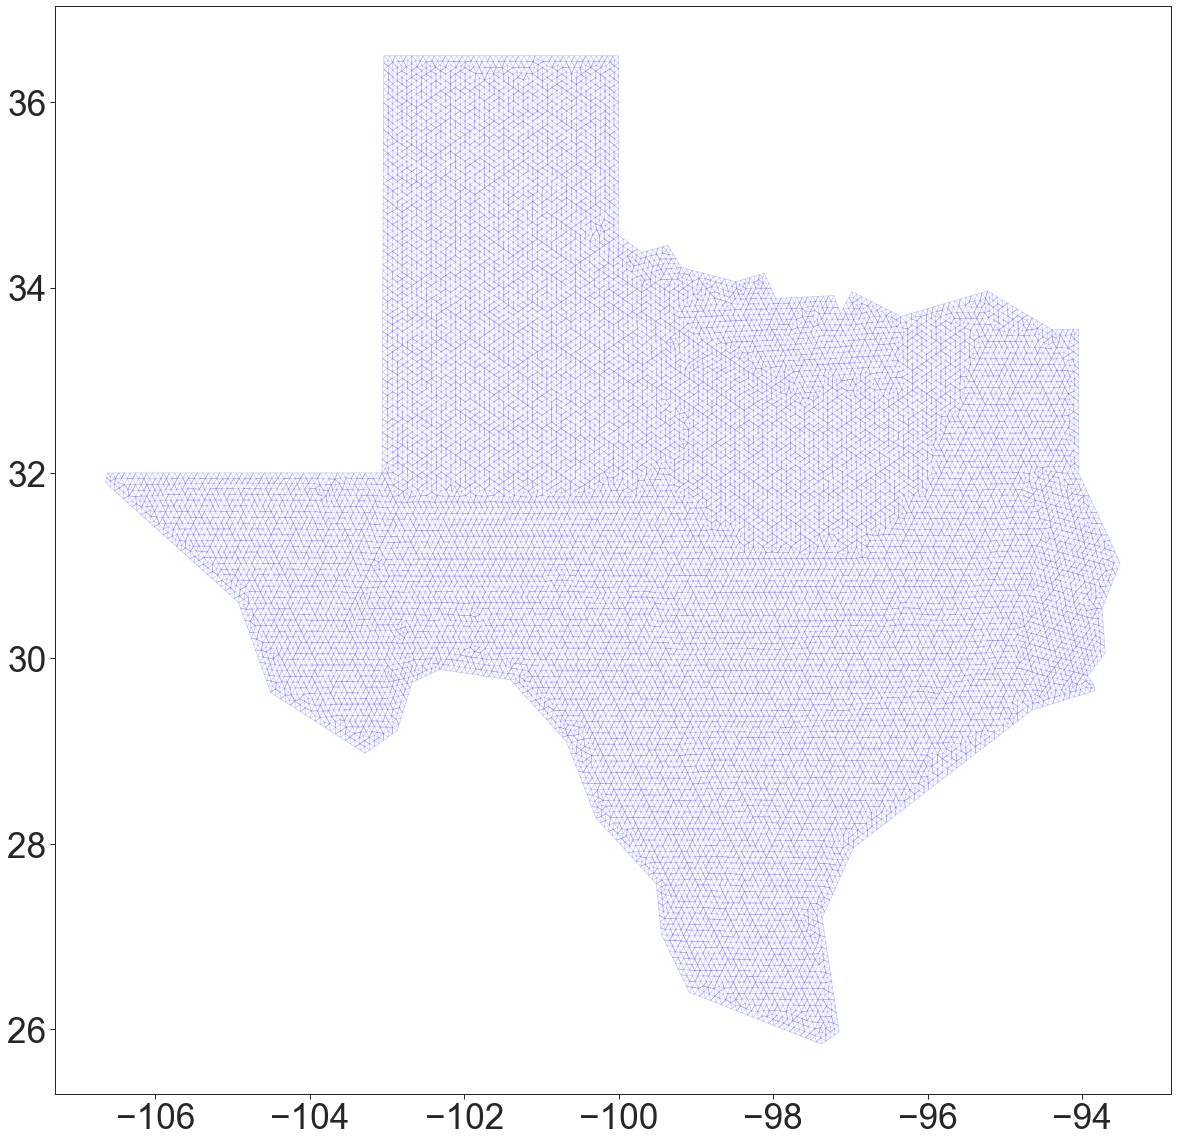

In [35]:
mesh_fname = 'mesh_2h'
mesh = pv.read(mesh_path + mesh_fname + '.vtk')

mesh_nodes = mesh.points
mesh_elems = mesh.cells

fig = plt.figure(figsize=(20, 20))
plt.autoscale(enable=True, axis='both')
plt.gca().set_facecolor("white")

plot_tri()
plt.savefig('fine_mesh.png')
# plt.savefig('plot_district_total_infected_cases_{}_{}.pdf'.format(covid_data_tdate[data_view_t].date(), mesh_fname))
plt.show()

## 

# compute mesh size of discretization

In [15]:
def get_tri_nodes(i, nodes, elems):
    vx = []
    vy = []
    for j in range(3):
        v = get_point(elems[4*i+j+1], nodes)
        vx.append(v[0])
        vy.append(v[1])
        
    return vx, vy

In [16]:
vx, vy = get_tri_nodes(i, mesh_nodes, mesh_elems)

x1 = vx[0]
x2 = vx[1]
y1 = vy[0]
y2 = vy[1]
dx = x2 - x1
dy = y2 - y1

min_dist = np.sqrt(dx * dx + dy * dy)
for i in range(len(vx)):
    x1 = vx[i]
    y1 = vy[i]
    
    for j in range(len(vx)):
        if i != j:
            x2 = vx[j]
            y2 = vy[j]
            
            if np.sqrt(dx * dx + dy * dy) < min_dist:
                min_dis = np.sqrt(dx * dx + dy * dy)
                
print(min_dist)

0.18941670695101856
